<div style="font-size: 14;color:green;font-size:30PX;font-family: arial;" align ="center" dir="rtl">
<b>
بررسی پارامترهای مختلف تولید در کارخانه تولید اکسیژن مجتع صنعتی چادرملو
</b>
</div>

<div style="font-size: 14;color:black;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1- آماده سازی داده ها
</b>
</div>

<div style="font-size: 14;color:black;font-size:20PX;font-family: arial;" align ="justify" dir="rtl">
<b>
1-1) فراخوان توابع و کتابخانه های مورد نیاز
</b>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans , AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
import os

#working_dir = os.getcwd()
working_dir ='..'  # Use on Jupyter Notebook

<div style="font-size: 14;color:black;font-size:20PX;font-family: arial;" align ="justify" dir="rtl">
<b>
2-1) ورود داده ها با فرمت دیتافریم
</b>
</div>

<div style="font-size: 14;color:black;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
توسط کتابخانه Pandas اطلاعات را بصورت دیتافریم وارد کرده و سپس ستون time را حذف می نماییم
</i>
</div>

In [3]:
df = pd.read_csv(f"{working_dir}/data/Oxygen_Plant_24Days.csv")
dt_without_time  = df.drop(labels='time',axis=1)
print(dt_without_time.shape)

(7198, 62)


<div style="font-size: 14;color:black;font-size:20PX;font-family: arial;" align ="justify" dir="rtl">
<b>
3-1) نرمال سازی داده ها با استفاده از تابع MinMax
</b>
</div>

In [4]:
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(dt_without_time) , columns= dt_without_time.columns)
print(normal_df.shape)
print(normal_df.head())

(7198, 62)
   AI1 Product gaseous (liquid) oxygen purity  \
0                                    0.949177   
1                                    0.963214   
2                                    0.971926   
3                                    0.974831   
4                                    0.977251   

   AI4 Oxygen content in waste nitrogen  \
0                              0.825601   
1                              0.847862   
2                              0.870124   
3                              0.873843   
4                              0.860840   

   Analys Argon (AI7) Product argon purity (O2 content)  \
0                                           0.287905      
1                                           0.287616      
2                                           0.287037      
3                                           0.287037      
4                                           0.287037      

   AI12 Carbon dioxide in plant air content (AI12)  \
0                         

<div style="font-size: 14;color:black;font-size:20PX;font-family: arial;" align ="justify" dir="rtl">
<b>
4-1) محاسبه ضریب همبستگی بین متغیرها
</b>
</div>

<div style="font-size: 14;color:black;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
از تابع corr در کتابخانه Pandas برای بدست آوردن ضرایب همبستگی استفاده می کنیم و سپس آن را نمایش می دهیم
</i>
</div>

In [5]:
corr_df = normal_df.corr().abs()
corr_df = corr_df.where(np.triu(np.ones(corr_df.shape),k= 1).astype(bool)) #paiine matice motegharen ast ve hazf shod

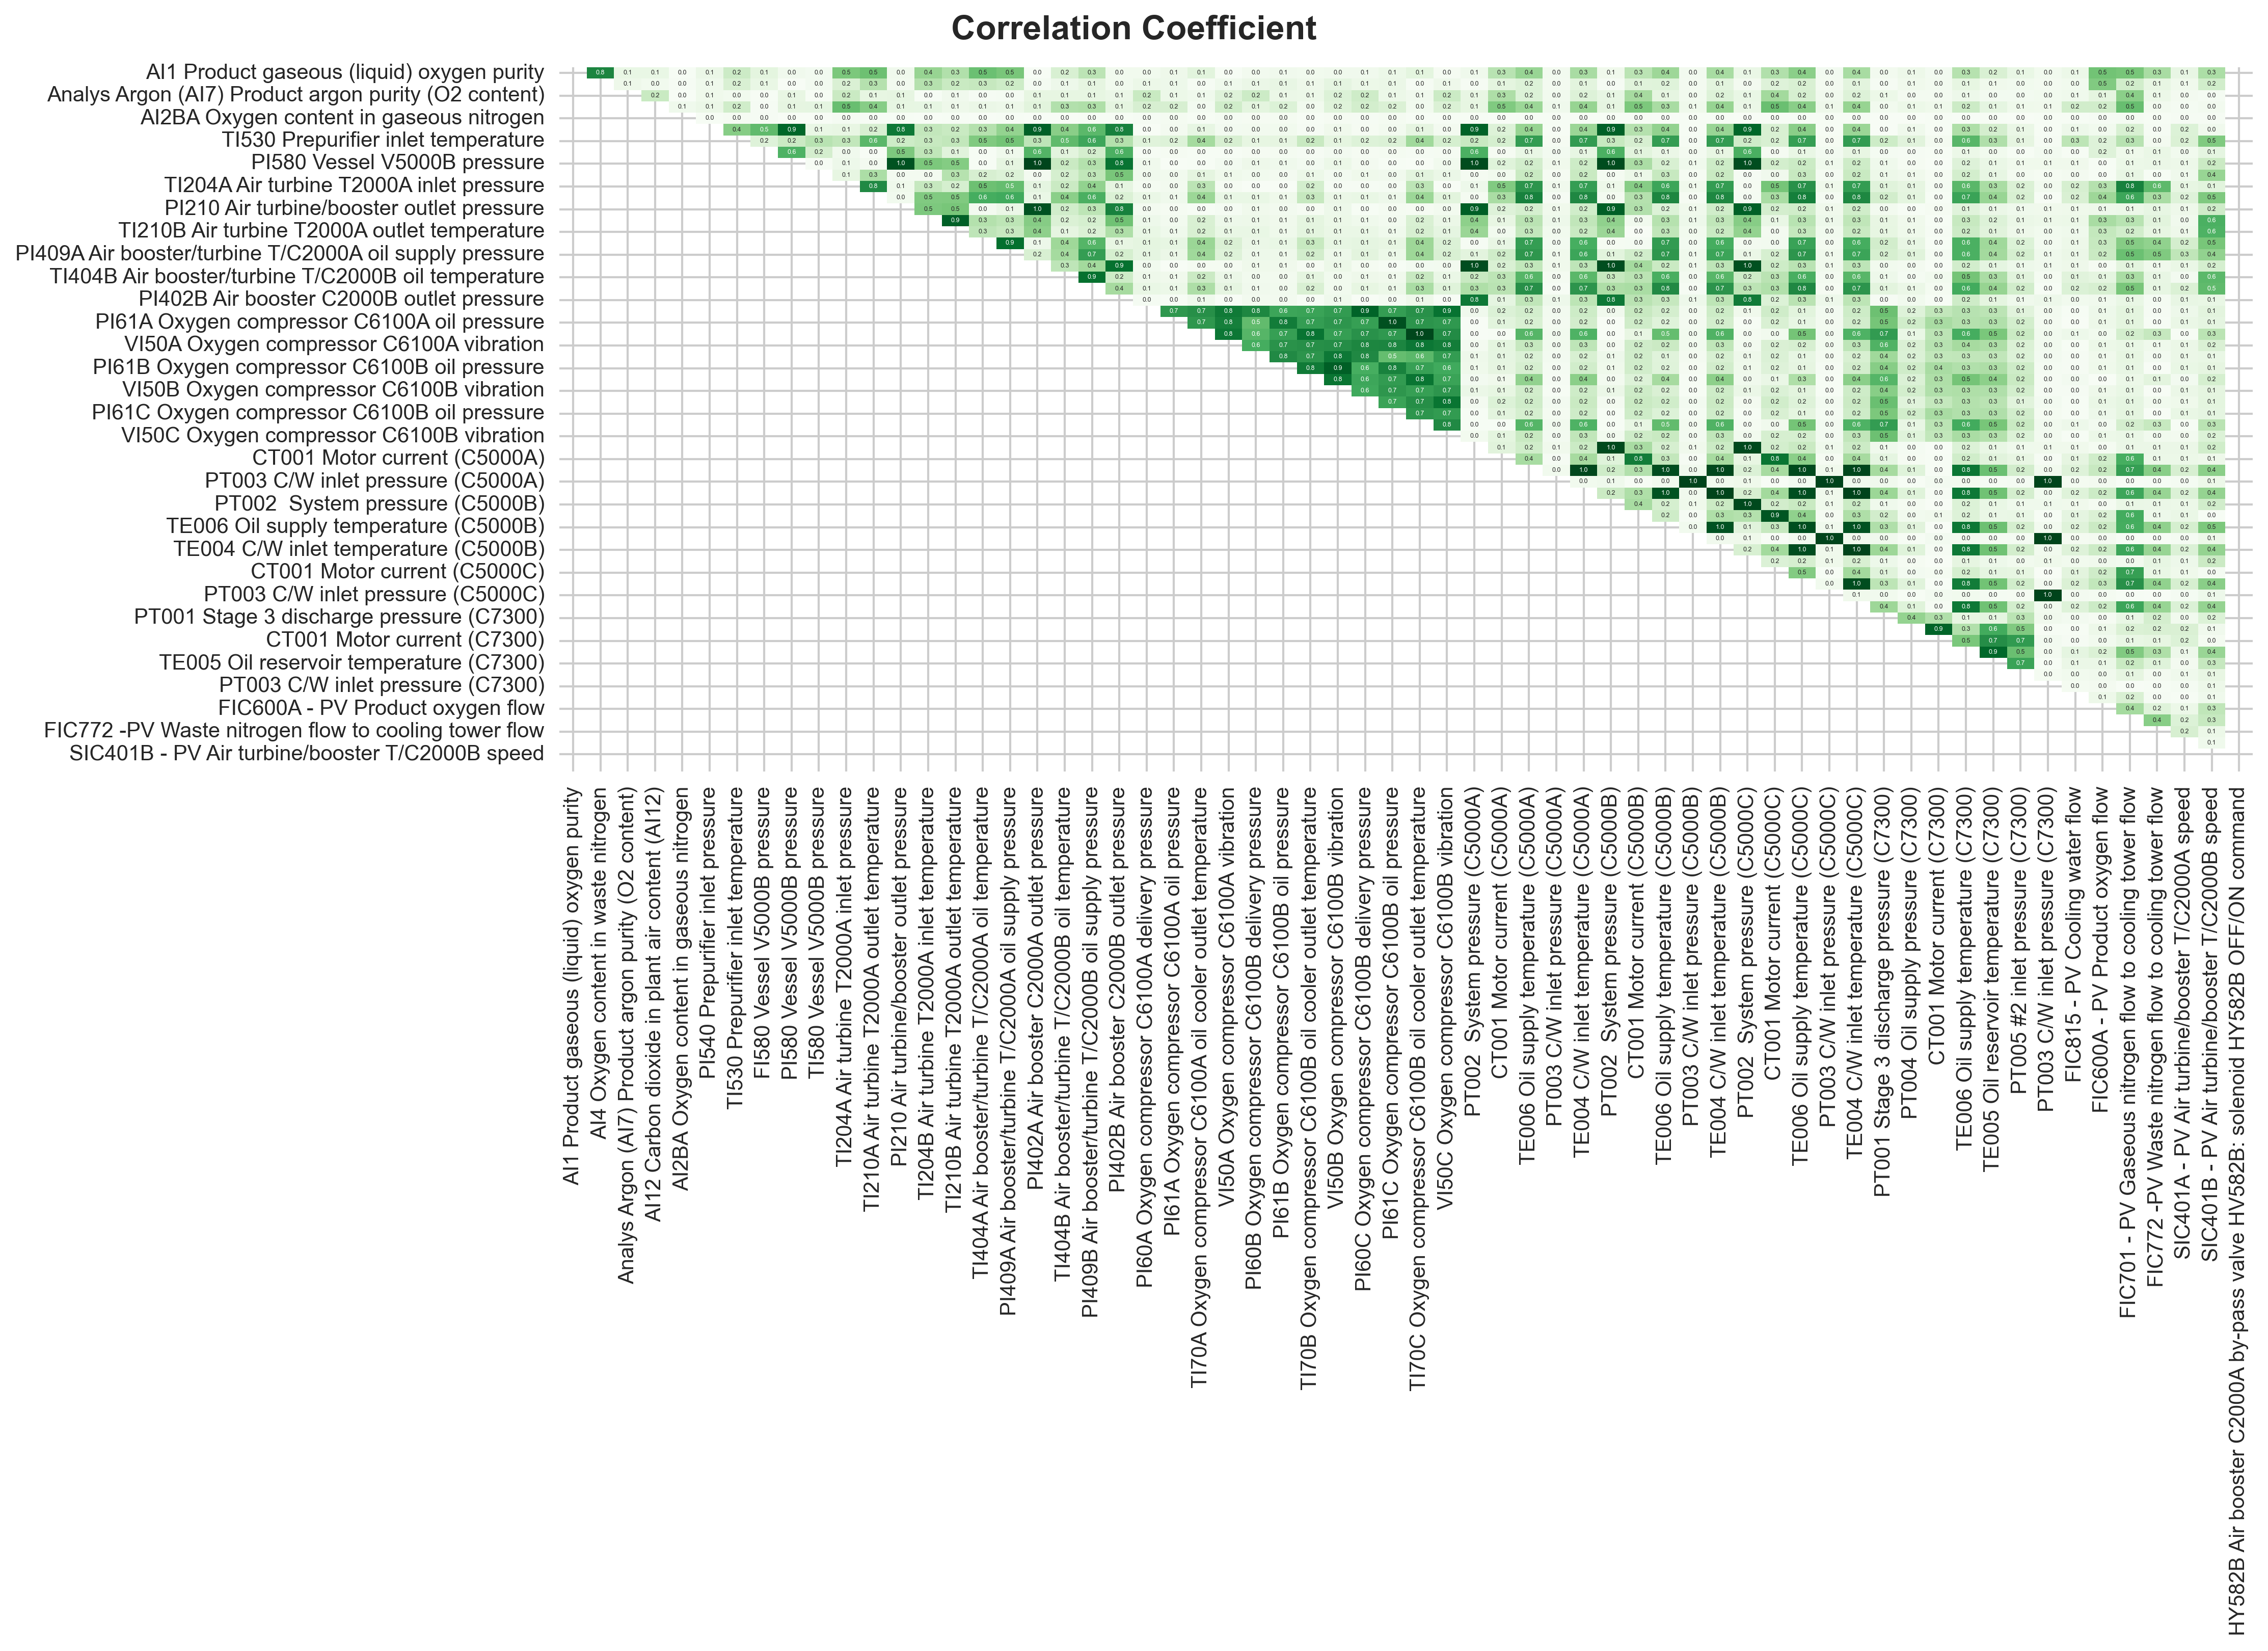

In [6]:
fig = plt.figure(figsize=(15,11),dpi=300)
fig.suptitle('Correlation Coefficient', fontsize=16,fontweight='bold')
ax1 = fig.subplots(1,1)
sns.heatmap(
    data=corr_df,
    cbar=False,
    square= False,
    fmt='.1f',
    annot=True,
    annot_kws={'size':3},
    cmap='Greens',
    ax= ax1
    )
fig.tight_layout()
#plt.savefig(f'{working_dir}/temp/Correlation_Coefficient.jpg')
plt.show()

<div style="font-size: 14;color:black;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
کلیه متغیرهایی که باهم همبستگی بیشتر از 0.95 دارند را مشخص می کنیم تا نسبت به حذف آنها تصمیم گیری نماییم 
</i>
</div>

In [7]:
high_corr_columns_name = pd.DataFrame(corr_df.ge(.95).stack().loc[lambda corr_df: corr_df].index.to_list())
print(high_corr_columns_name.head())

                              0                                          1
0  PI580 Vessel V5000B pressure  PI210 Air turbine/booster outlet pressure
1  PI580 Vessel V5000B pressure  PI402A Air booster C2000A outlet pressure
2  PI580 Vessel V5000B pressure            PT002  System pressure (C5000A)
3  PI580 Vessel V5000B pressure            PT002  System pressure (C5000B)
4  PI580 Vessel V5000B pressure            PT002  System pressure (C5000C)


<div style="font-size: 14;color:black;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
متغیرهایی که به دلیل همبستگی بالا حذف می شوند عبارتند از:
</i>
</div>

In [8]:
high_corr_to_drop = pd.read_csv(f"{working_dir}/data/high_corr_features.csv")
print(high_corr_to_drop)

                                   high_corr_features
0                     PT002  System pressure (C5000B)
1                     PT002  System pressure (C5000C)
2         PI61C Oxygen compressor C6100B oil pressure
3   TI70C Oxygen compressor C6100B oil cooler outl...
4               TE006 Oil supply temperature (C5000B)
5                TE004 C/W inlet temperature (C5000B)
6               TE006 Oil supply temperature (C5000C)
7                TE004 C/W inlet temperature (C5000C)
8                   PT003 C/W inlet pressure (C5000B)
9                   PT003 C/W inlet pressure (C5000C)
10                   PT003 C/W inlet pressure (C7300)


In [9]:
df.drop(labels=high_corr_to_drop['high_corr_features'] ,axis=1,inplace=True)
dt_without_time  = df.drop(labels='time',axis=1)
print(dt_without_time.shape)

(7198, 51)


<div style="font-size: 14;color:black;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
2- مشخص کردن آنورمالی در داده ها (Clustering)
</b>
</div>

<div style="font-size: 14;color:black;font-size:20PX;font-family: arial;" align ="justify" dir="rtl">
<b>
1-2) کاهش متغیرها با استفاده از الگوریتم PCA
</b>
</div>

In [11]:
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(dt_without_time) , columns= dt_without_time.columns)
print(normal_df.shape)

#pca = PCA(random_state=0)
pca = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3)
pca.fit_transform(normal_df)
#print(pca.explained_variance_ratio_)
#print(np.cumsum(pca.explained_variance_ratio_)*100)


(7198, 51)


array([[  -2.9881043,   50.030212 ],
       [  -2.9450796,   50.2316   ],
       [  -2.7690647,   50.176643 ],
       ...,
       [-101.1912   ,   -4.2520714],
       [-101.278854 ,   -4.3933463],
       [ -53.10819  ,   36.992146 ]], dtype=float32)

<div style="font-size: 14;color:black;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
با توجه به نتایج حاصله برای حفظ 75 درصد خواص داده ها می توانیم متغیرها را به حداقل شش عدد کاهش دهیم
</i>
</div>

In [ ]:
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(dt_without_time) , columns= dt_without_time.columns)
print(normal_df.shape)

#pca = PCA(n_components=6,random_state=0)
pca = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3)
data=pca.fit_transform(normal_df)
#pca_column_name = [f"PCA{column}"  for column in range(pca.n_components_) ]
pca_column_name = [f"PCA{column}"  for column in range(2) ]
pca_df = pd.DataFrame(data=data,columns=pca_column_name)
#print(np.cumsum(pca.explained_variance_ratio_)*100)
print(pca_df.shape)

(7198, 51)
(7198, 2)


<div style="font-size: 14;color:black;font-size:20PX;font-family: arial;" align ="justify" dir="rtl">
<b>
2-2) خوشه بندی داده های کاهش یافته با الگوریتم Agglomerative
</b>
</div>

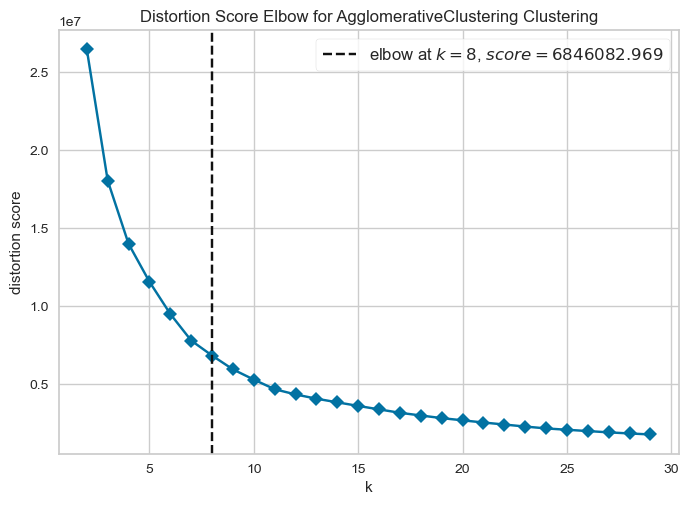

<Figure size 800x550 with 0 Axes>

In [14]:
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
# Fit data to visualizer
visualizer.fit(pca_df)
# Finalize and render figure
visualizer.show()
visualizer.fig.clf()

<div style="font-size: 14;color:black;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
با توجه به آنالیز فوق مناسب ترین تعداد Cluster نه عدد می باشد بنابراین خوشه بندی را با 9 عدد انجام می دهیم
</i>
</div>

In [15]:
model = AgglomerativeClustering(n_clusters = 9, metric= 'euclidean', linkage ='average')
model.fit(pca_df)
print(np.unique(model.labels_))
print(model.labels_.shape)

[0 1 2 3 4 5 6 7 8]
(7198,)


<div style="font-size: 14;color:black;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
مشاهده خوشه بندی انجام شده
</i>
</div>

C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_8748\2588595028.py:10: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.scatterplot(


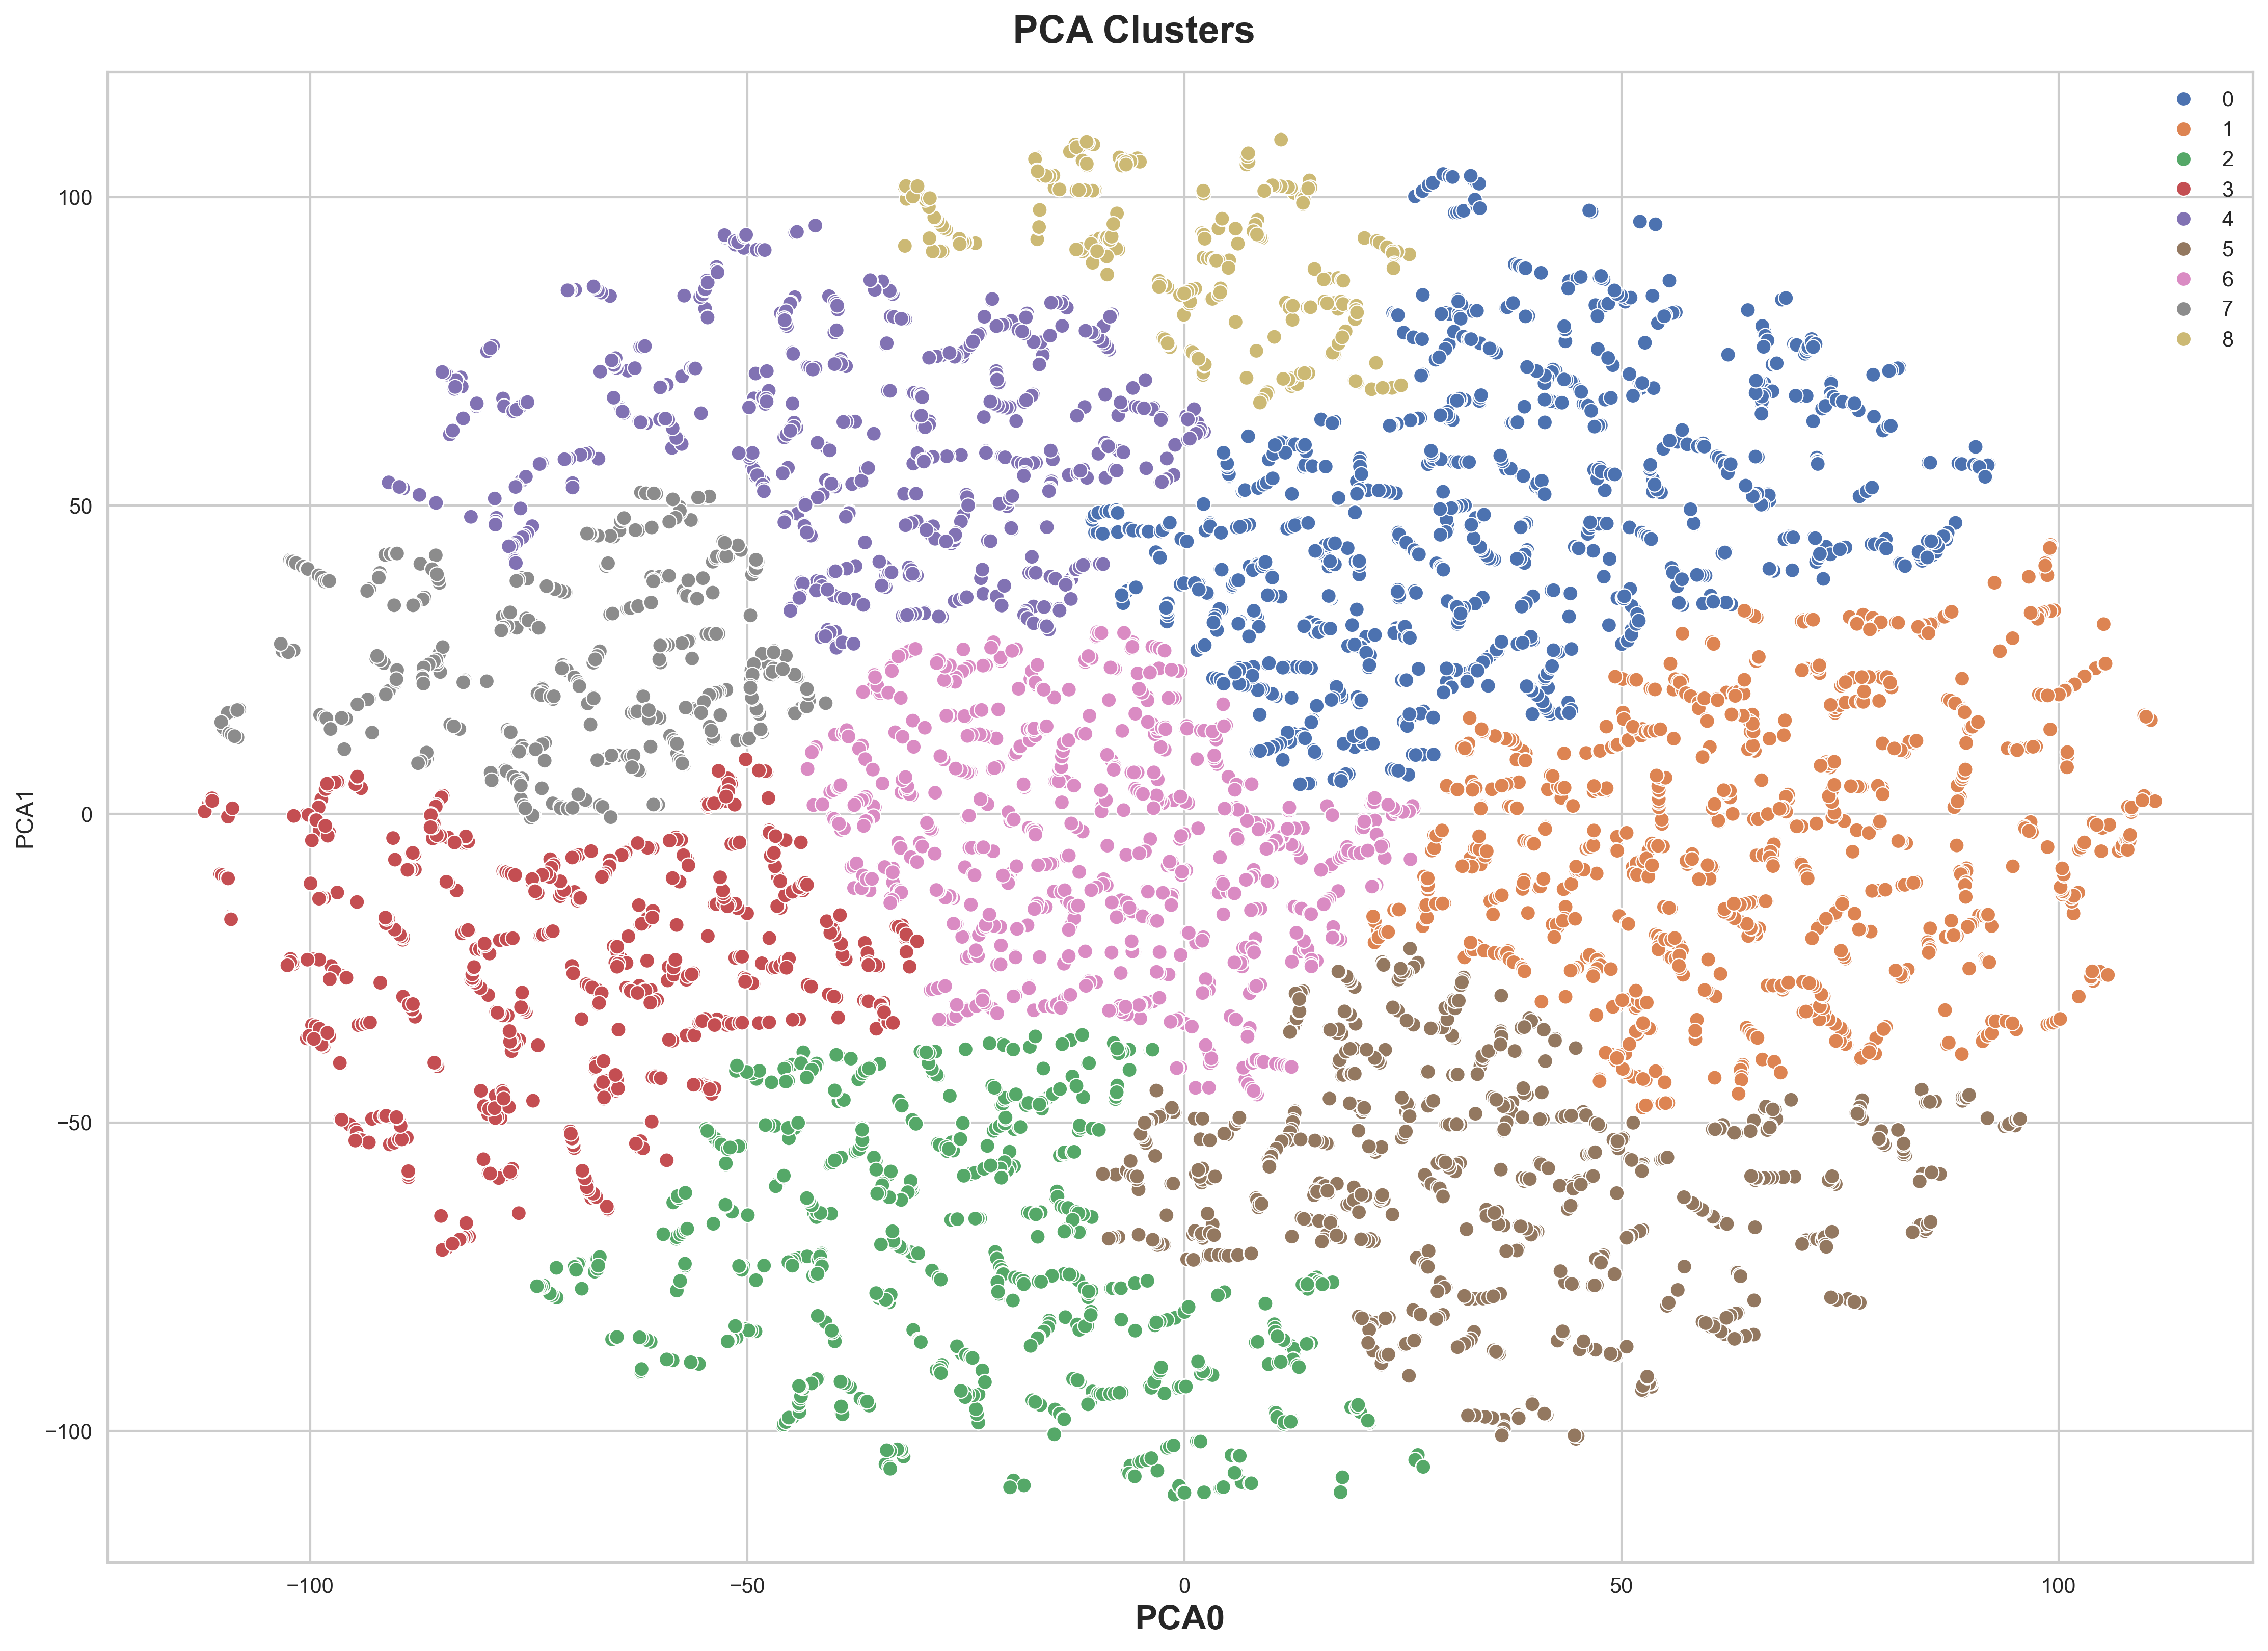

In [17]:
fig = plt.figure(figsize=(15,11),dpi=300)
fig.suptitle('PCA Clusters', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('PCA0', fontsize=16,fontweight='bold')

#ax1.set_xlim(99.7,99.9)
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
cmap = sns.color_palette("deep", as_cmap=True)
#cmap = sns.light_palette('seagreen', as_cmap=True)
sns.scatterplot(
    data=pca_df,
    x='PCA0',
    y='PCA1',
    hue=model.labels_,
    #hue_order=[0,2,3,],
    #fill=False,
    #alpha = 0.4,
    palette= cmap,
    )
#plt.axvline(99.827, c='green')
#plt.annotate('99.827 %', xy =(99.825, 5),rotation = 90,ha='center', fontsize=20,alpha = 0.8)
#plt.axvline(99.807, c='green')
#plt.annotate('99.807 %', xy =(99.805, 5),rotation = 90,ha='center', fontsize=20,alpha = 0.8)
#sns.move_legend(obj = ax1, loc = 'best', labels=["Adelie", "Chinstrap", "Gentoo"])
fig.tight_layout()
#plt.savefig(f'{working_dir}/fig/C5000 Amp VS O2 purity.jpg')
plt.show()

<div style="font-size: 14;color:black;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
اکنون لیبل های بدست آمده را به دیتابیس اصلی اضافه و برای استفاده های بعدی دیتابیس را سیو می کنیم
</i>
</div>

In [18]:
df["labels"] = model.labels_
print(df.shape)
df.to_csv(f"{working_dir}/data/final_oxy_with_labels.csv",index=False)

(7198, 53)


<div style="font-size: 14;color:black;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
3- بررسی داده ها با توجه به خوشه بندی انجام شده
</b>
</div>

<div style="font-size: 14;color:black;font-size:20PX;font-family: arial;" align ="justify" dir="rtl">
<b>
1-3) خلوص اکسیژن مایع تولیدی در چه کلاس هایی بوده است
</b>
</div>

C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_8748\762006931.py:8: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(


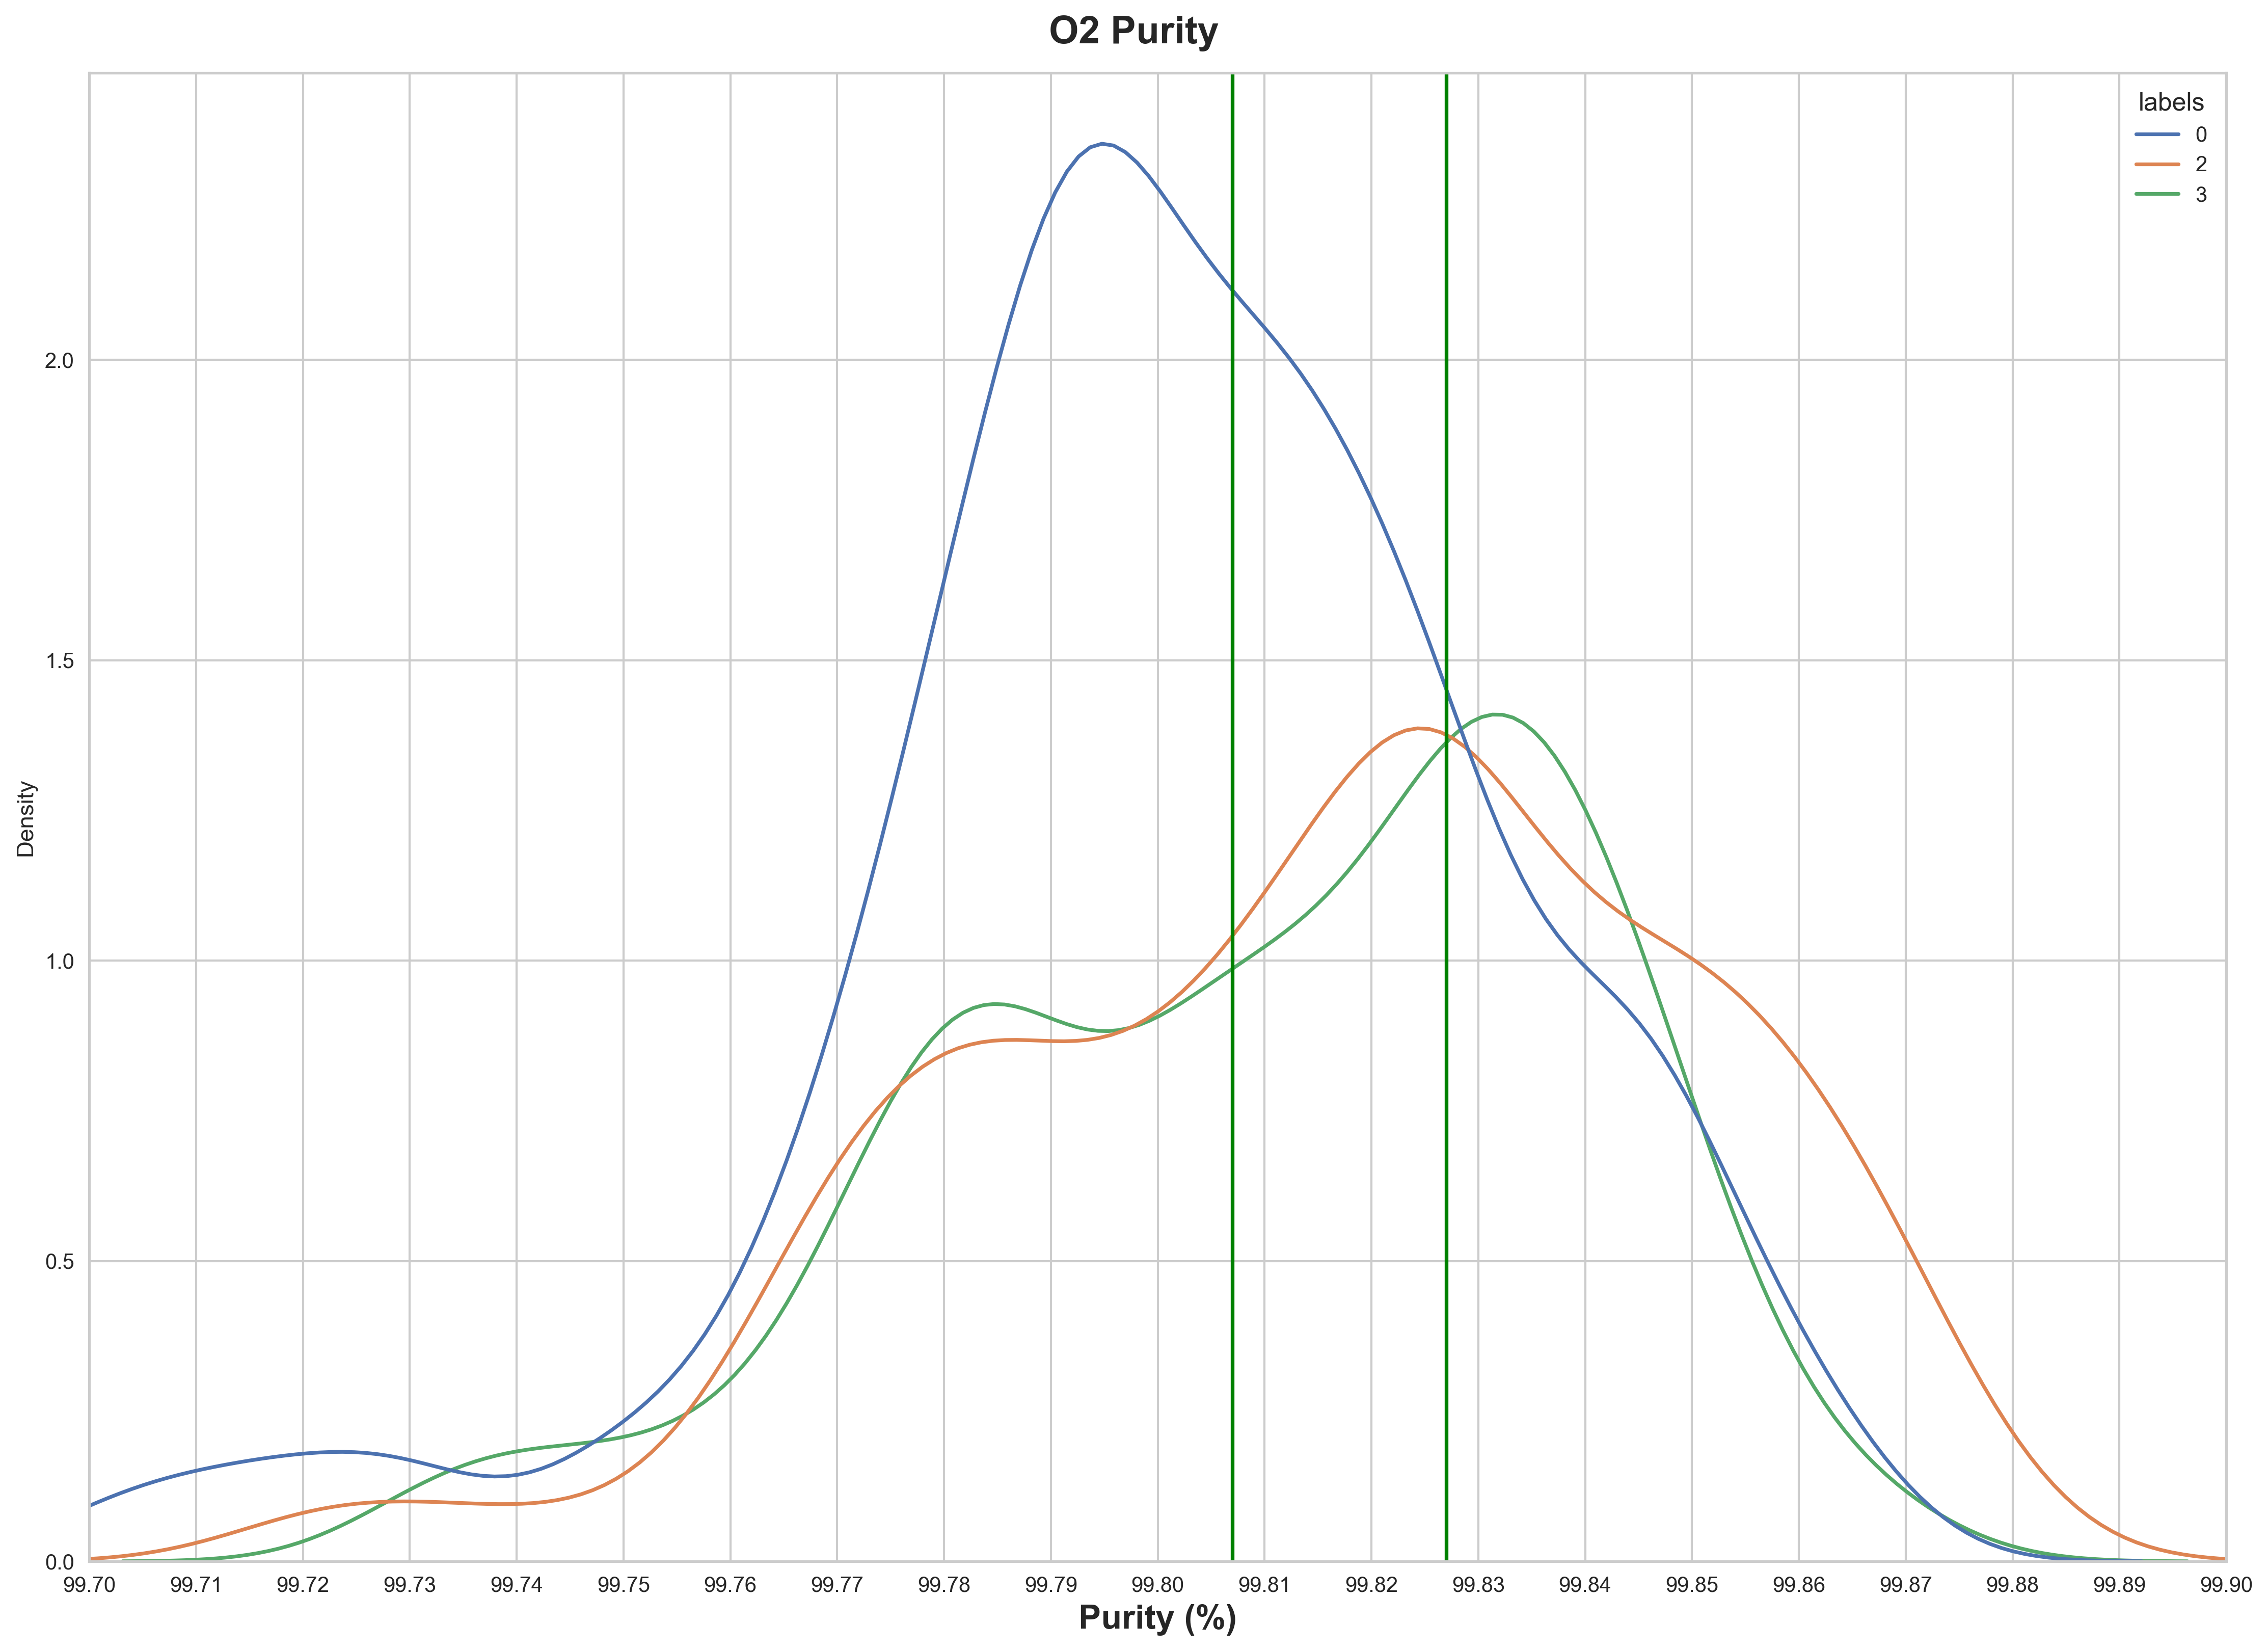

In [19]:
fig = plt.figure(figsize=(15,11),dpi=300)
fig.suptitle('O2 Purity', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('Purity (%)', fontsize=16,fontweight='bold')
ax1.set_xlim(99.7,99.9)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
#cmap = sns.light_palette('seagreen', as_cmap=True)
sns.kdeplot(
    data=df,
    x='AI1 Product gaseous (liquid) oxygen purity',
    hue="labels",
    hue_order=[0,2,3,],
    fill=False,
    #alpha = 0.4,
    palette= cmap,
    )
plt.axvline(99.827, c='green')
plt.annotate('99.827 %', xy =(99.825, 5),rotation = 90,ha='center', fontsize=20,alpha = 0.8)
plt.axvline(99.807, c='green')
plt.annotate('99.807 %', xy =(99.805, 5),rotation = 90,ha='center', fontsize=20,alpha = 0.8)
fig.tight_layout()
#plt.savefig(f'{working_dir}/fig/C5000 Amp VS O2 purity.jpg')
plt.show()


<div style="font-size: 14;color:black;font-size:20PX;font-family: arial;" align ="justify" dir="rtl">
<b>
2-3) نقاط کاری برای کلاس های بدست آمده
</b>
</div>

<div style="font-size: 14;color:black;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
نقاط کاری خلوص اکسیژن و نیتروژن
</i>
</div>

C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_8748\4277976694.py:18: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(


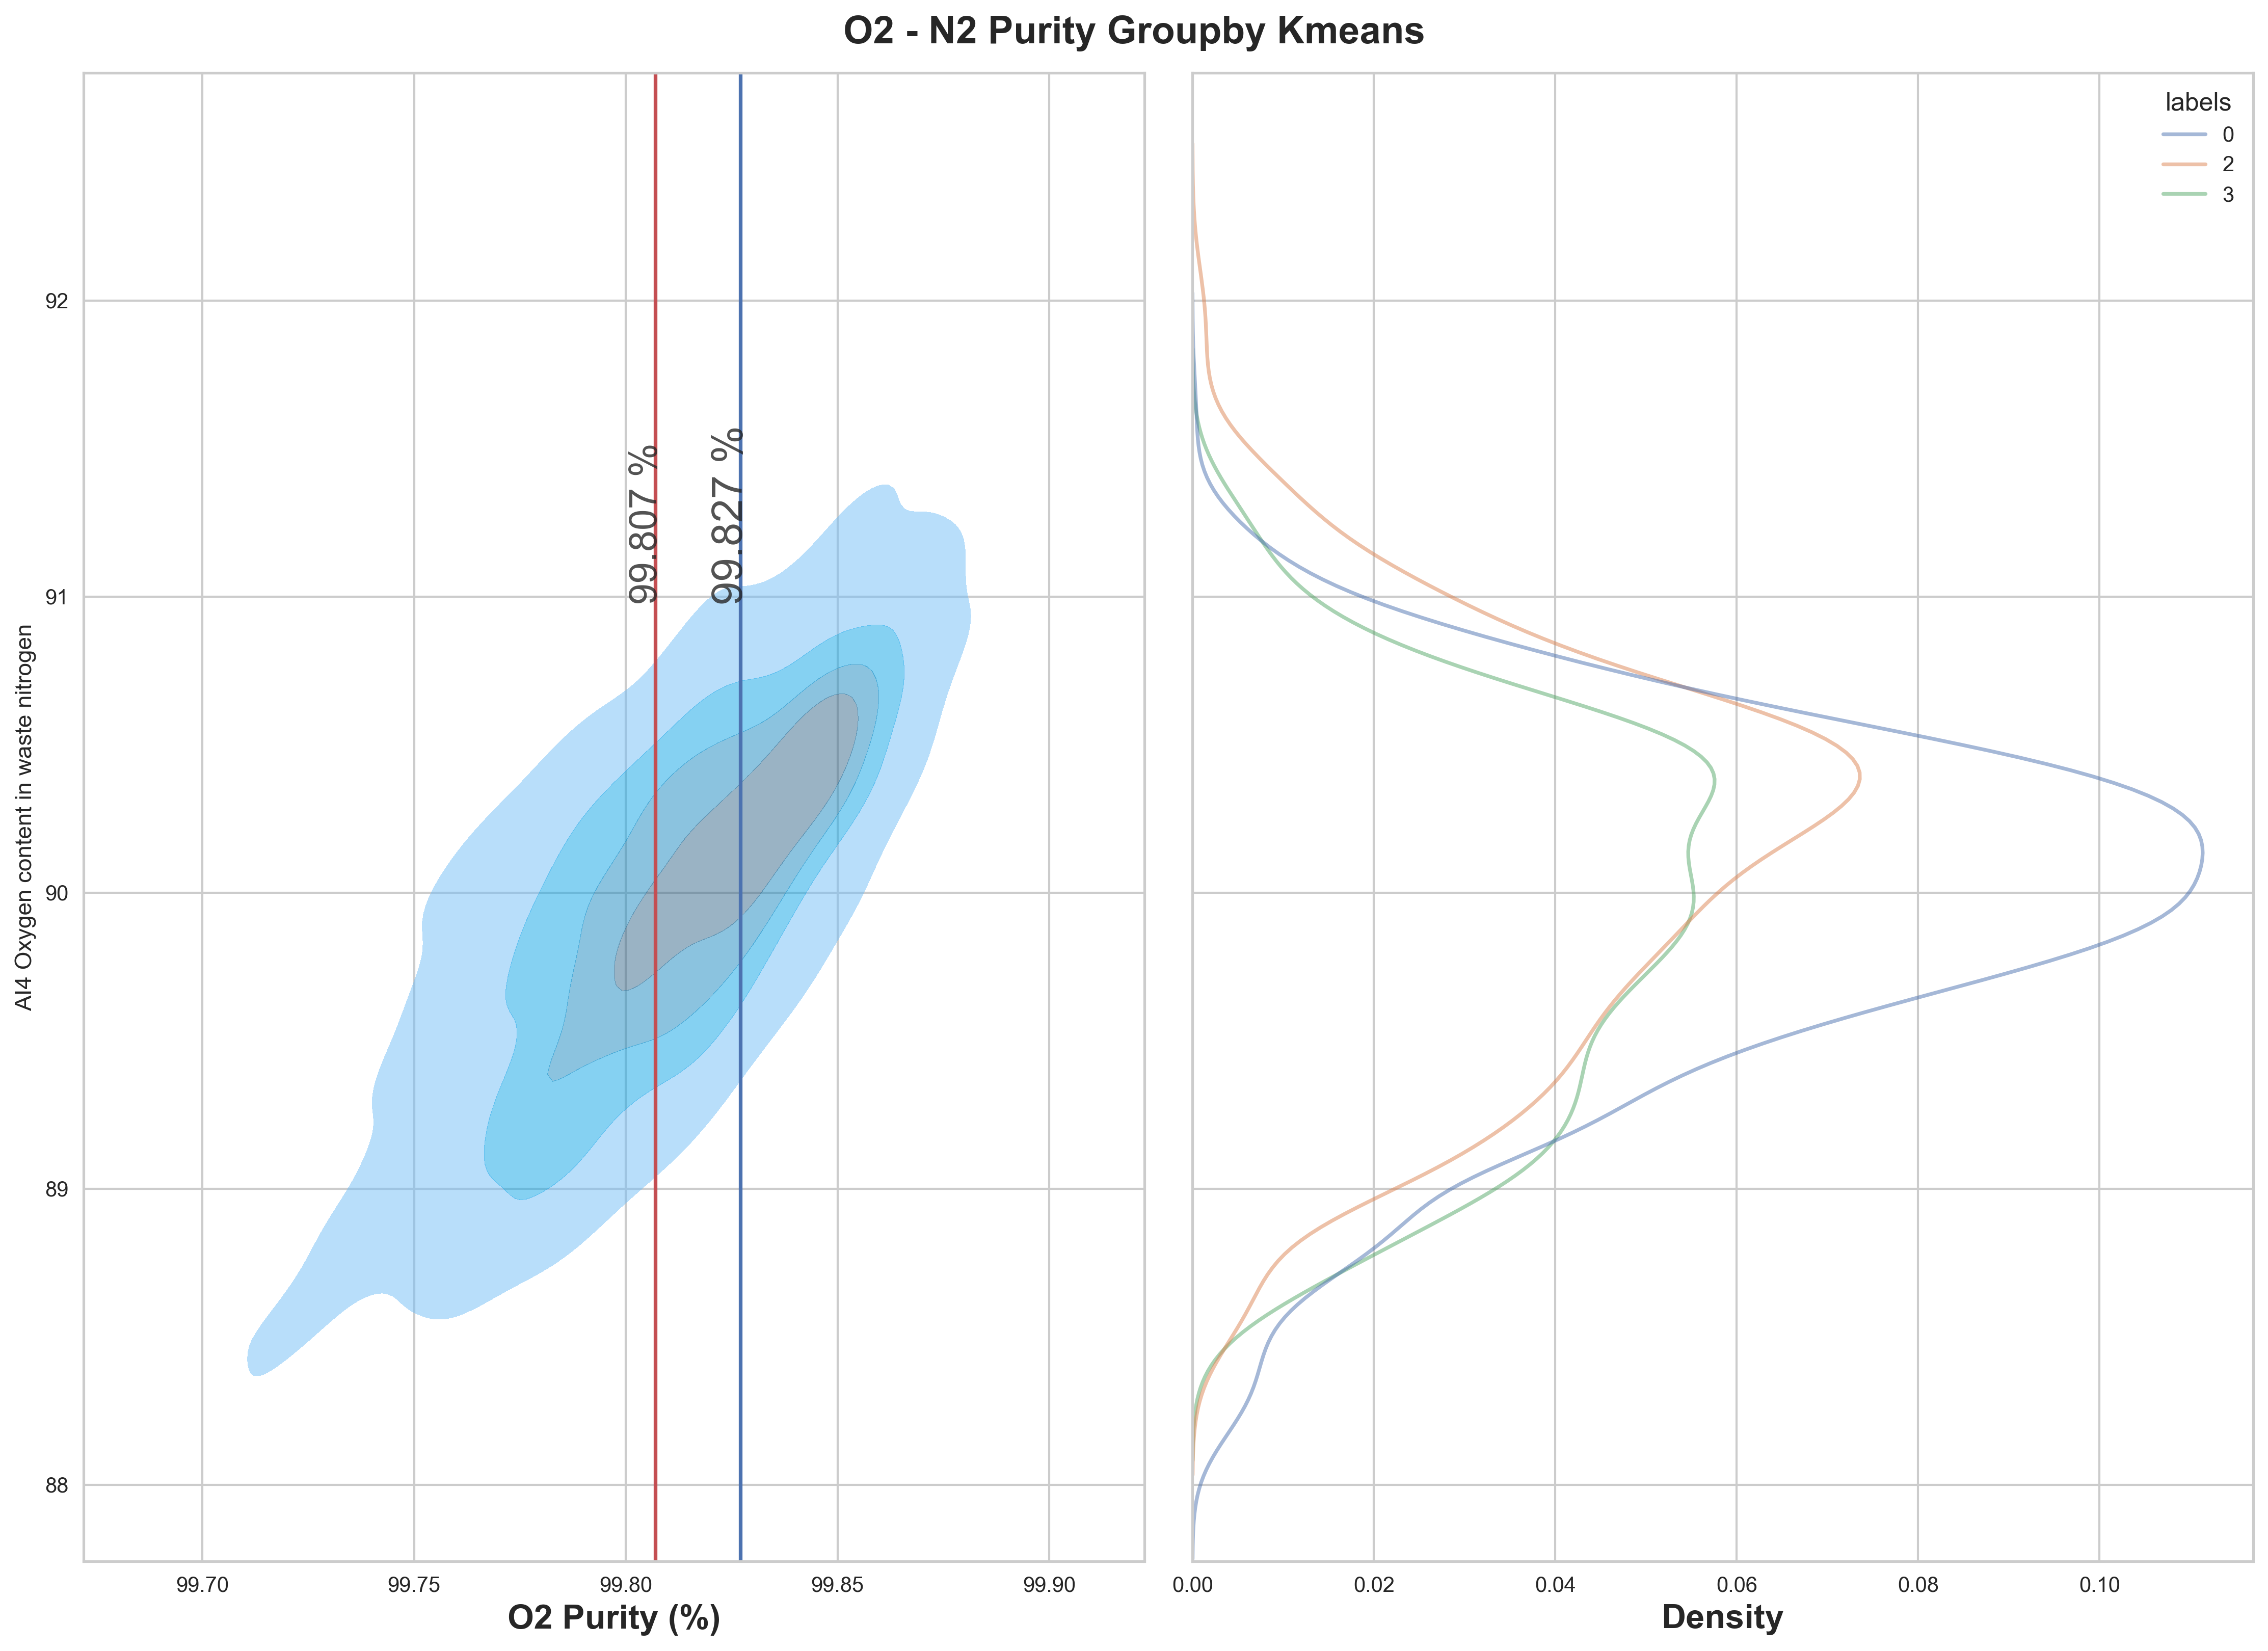

In [20]:
#// Histogram of O2 Purity By Kmeans Clusters
fig = plt.figure(figsize=(15,11),dpi=300)
fig.suptitle('O2 - N2 Purity Groupby Kmeans', fontsize=18,fontweight='bold')
ax1,ax2 = fig.subplots(1,2,sharey=True)
ax1.set_xlabel('O2 Purity (%)', fontsize=16,fontweight='bold')
ax2.set_xlabel('Density', fontsize=16,fontweight='bold')
sns.kdeplot(
        data=df,
        x= 'AI1 Product gaseous (liquid) oxygen purity',
        y= 'AI4 Oxygen content in waste nitrogen',
        #hue= 'labels',
        hue_order=[0,3],
        alpha = 0.5,
        fill=True,
        levels=5,
        ax= ax1
            )
sns.kdeplot(
        data=df,
        y= 'AI4 Oxygen content in waste nitrogen',
        hue= 'labels',
        hue_order= [0,2,3],
        alpha = 0.5,
        palette= cmap,
        ax= ax2
            )
ax1.axvline(99.827, c=cmap[0])
ax1.annotate('99.827 %', xy =(99.825, 91),rotation = 90,ha='center', fontsize=20,alpha = 0.8)
ax1.axvline(99.807, c=cmap[3])
ax1.annotate('99.807 %', xy =(99.805, 91),rotation = 90,ha='center', fontsize=18,alpha = 0.8)
#ax3.axvline(99.795, c='red')
#ax3.annotate('99.79', xy =(99.79, 75),rotation = 90,ha='center', fontsize=18,alpha = 0.8)
fig.tight_layout()
#plt.savefig(f'{working_dir}/kmeans-output/histogram-O2-purity-groupby-kmeans.jpg')
plt.show()
fig.clear()

<div style="font-size: 14;color:black;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
نقاط کاری توربین
</i>
</div>

C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_8748\3135971416.py:9: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(


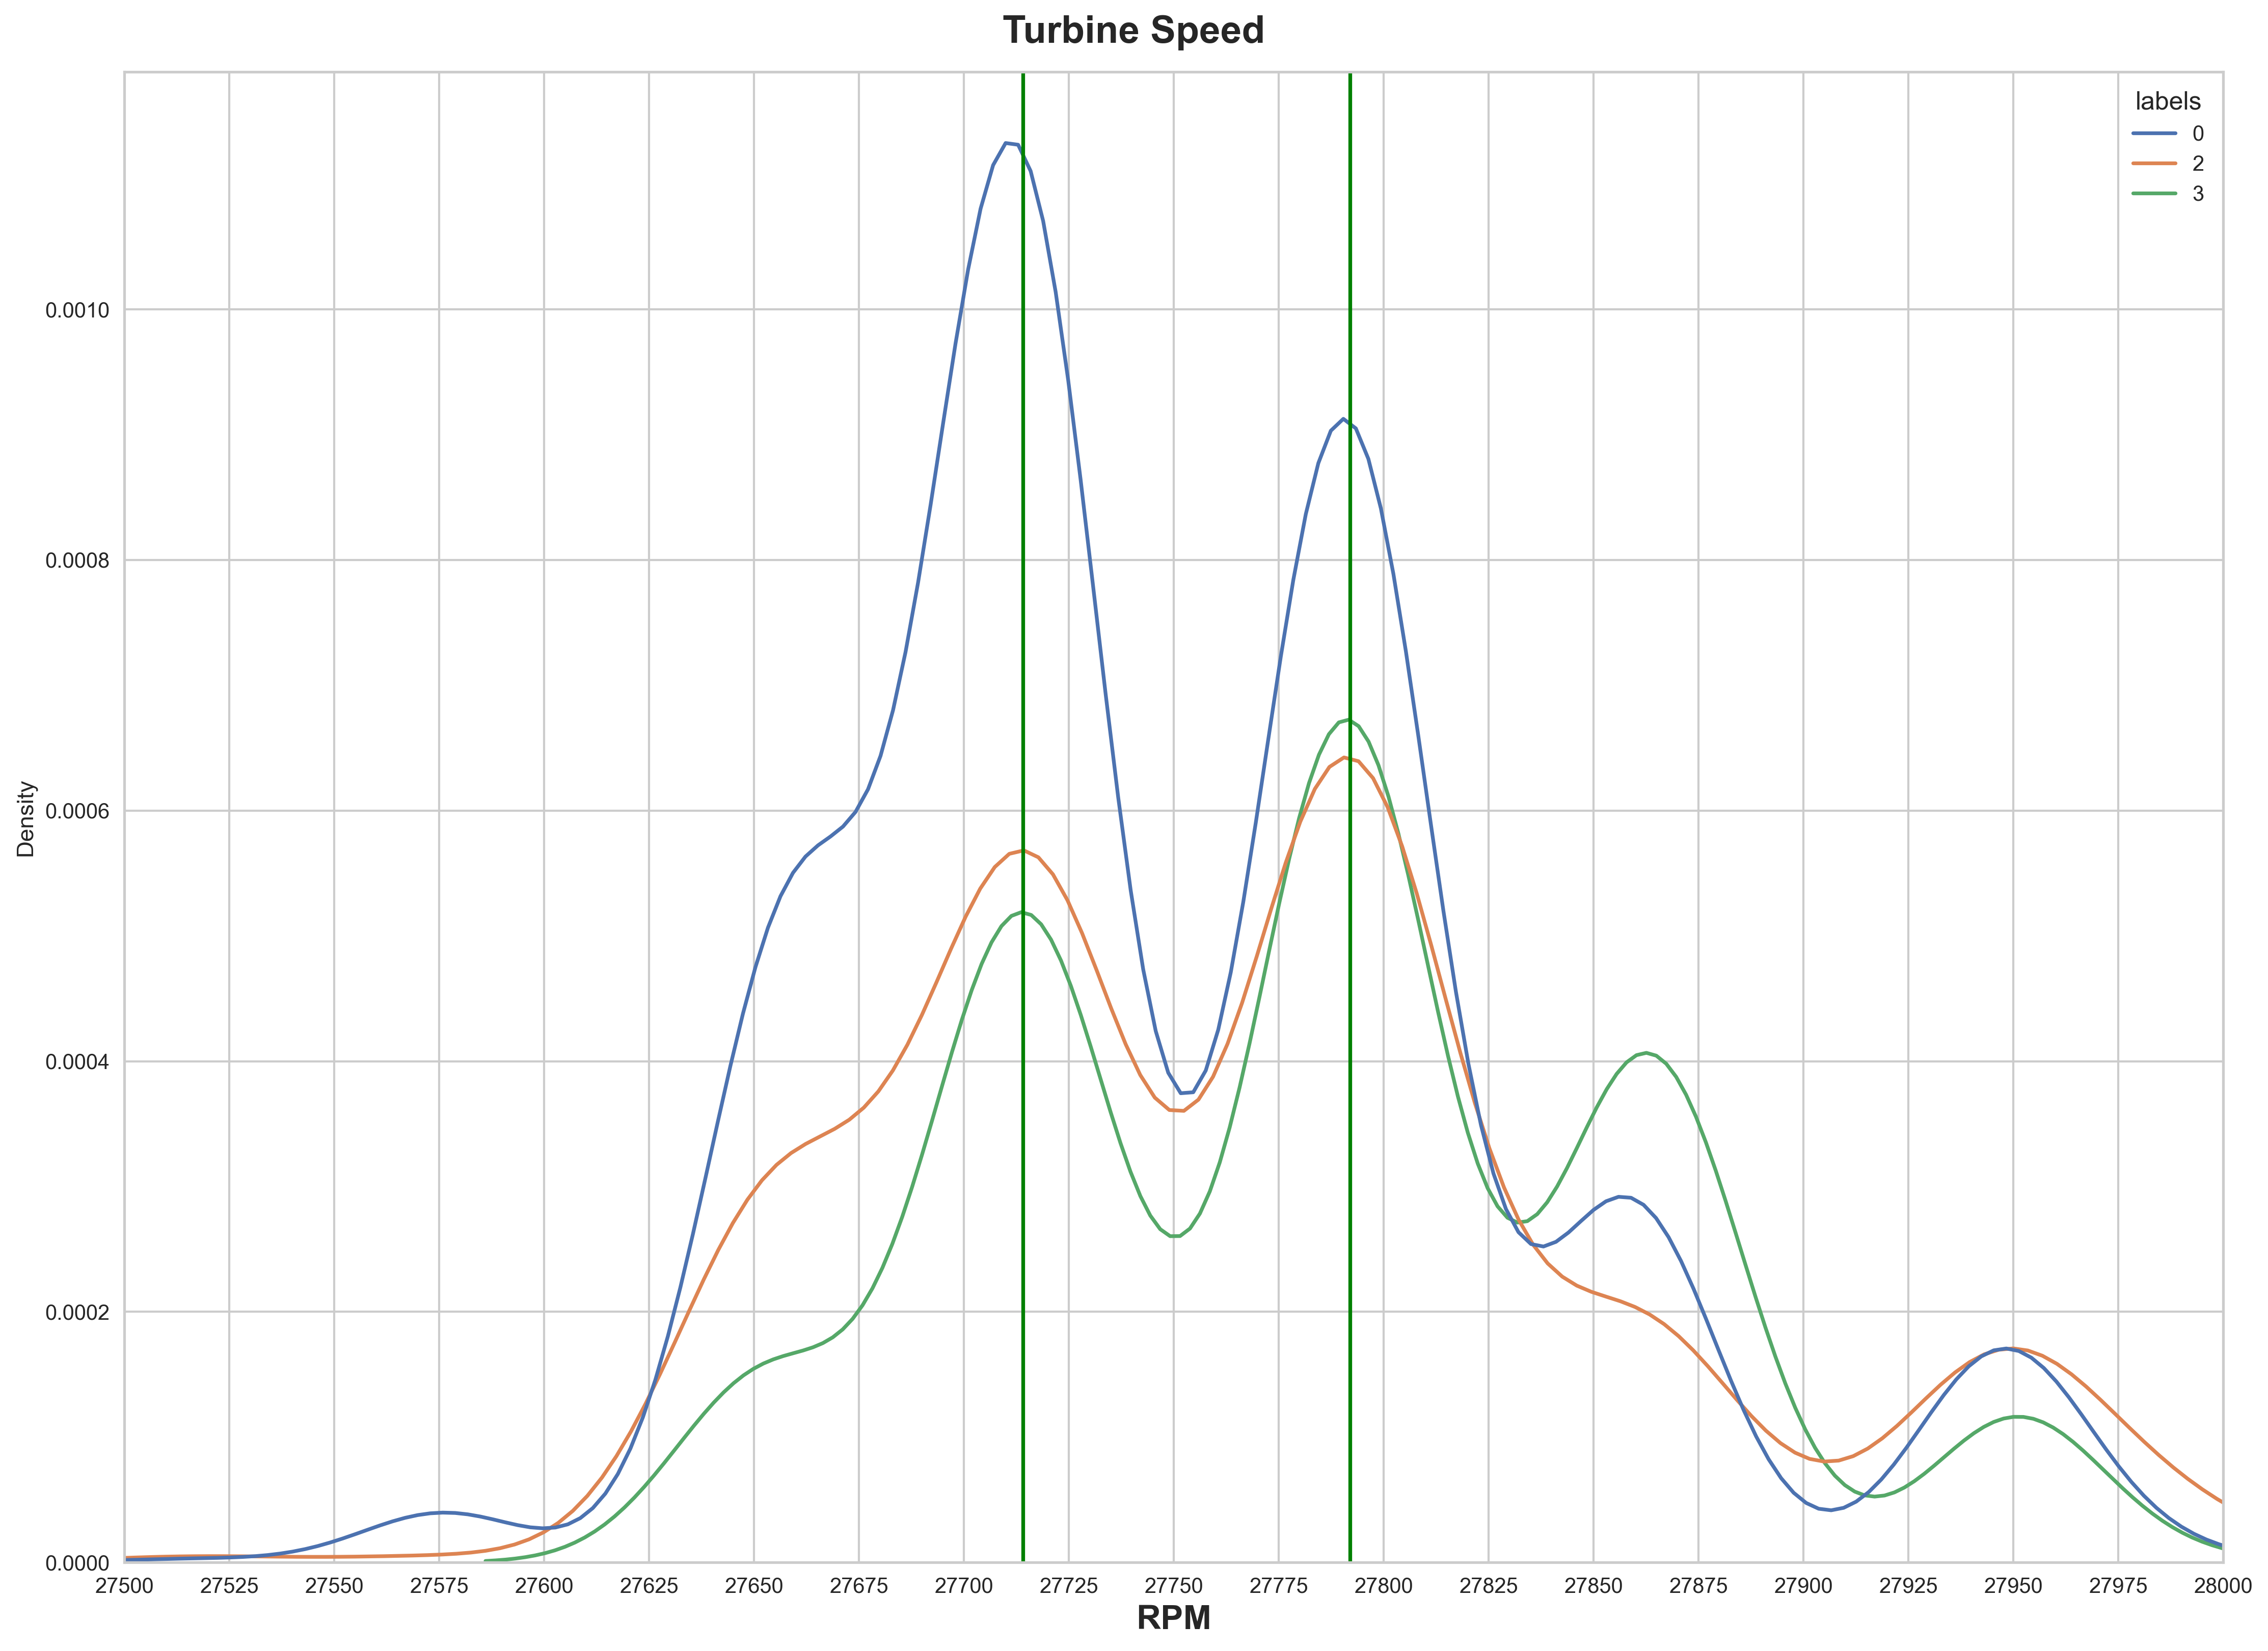

In [21]:
fig = plt.figure(figsize=(15,11),dpi=300)
fig.suptitle('Turbine Speed', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('RPM', fontsize=16,fontweight='bold')
ax1.set_xlim(27500,28000)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(25))
cmap = sns.color_palette("deep", as_cmap=True)
#cmap = sns.light_palette('seagreen', as_cmap=True)
sns.kdeplot(
    data=df,
    x='SIC401B - PV Air turbine/booster T/C2000B speed',
    hue="labels",
    hue_order=[0,2,3,],
    fill=False,
    #alpha = 0.4,
    palette= cmap,
    )
plt.axvline(27714, c='green')
plt.annotate('27714 RPM', xy =(27713.5, 0.002),rotation = 90,ha='center', fontsize=20,alpha = 0.8)
plt.axvline(27792, c='green')
plt.annotate('27792 RPM', xy =(27791.5, 0.002),rotation = 90,ha='center', fontsize=20,alpha = 0.8)
fig.tight_layout()
#plt.savefig(f'{working_dir}/fig/C5000 Amp VS O2 purity.jpg')
plt.show()

<div style="font-size: 14;color:black;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
دمای هوای ورودی به بوستر توربین
</i>
</div>

C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_8748\3817397575.py:19: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(


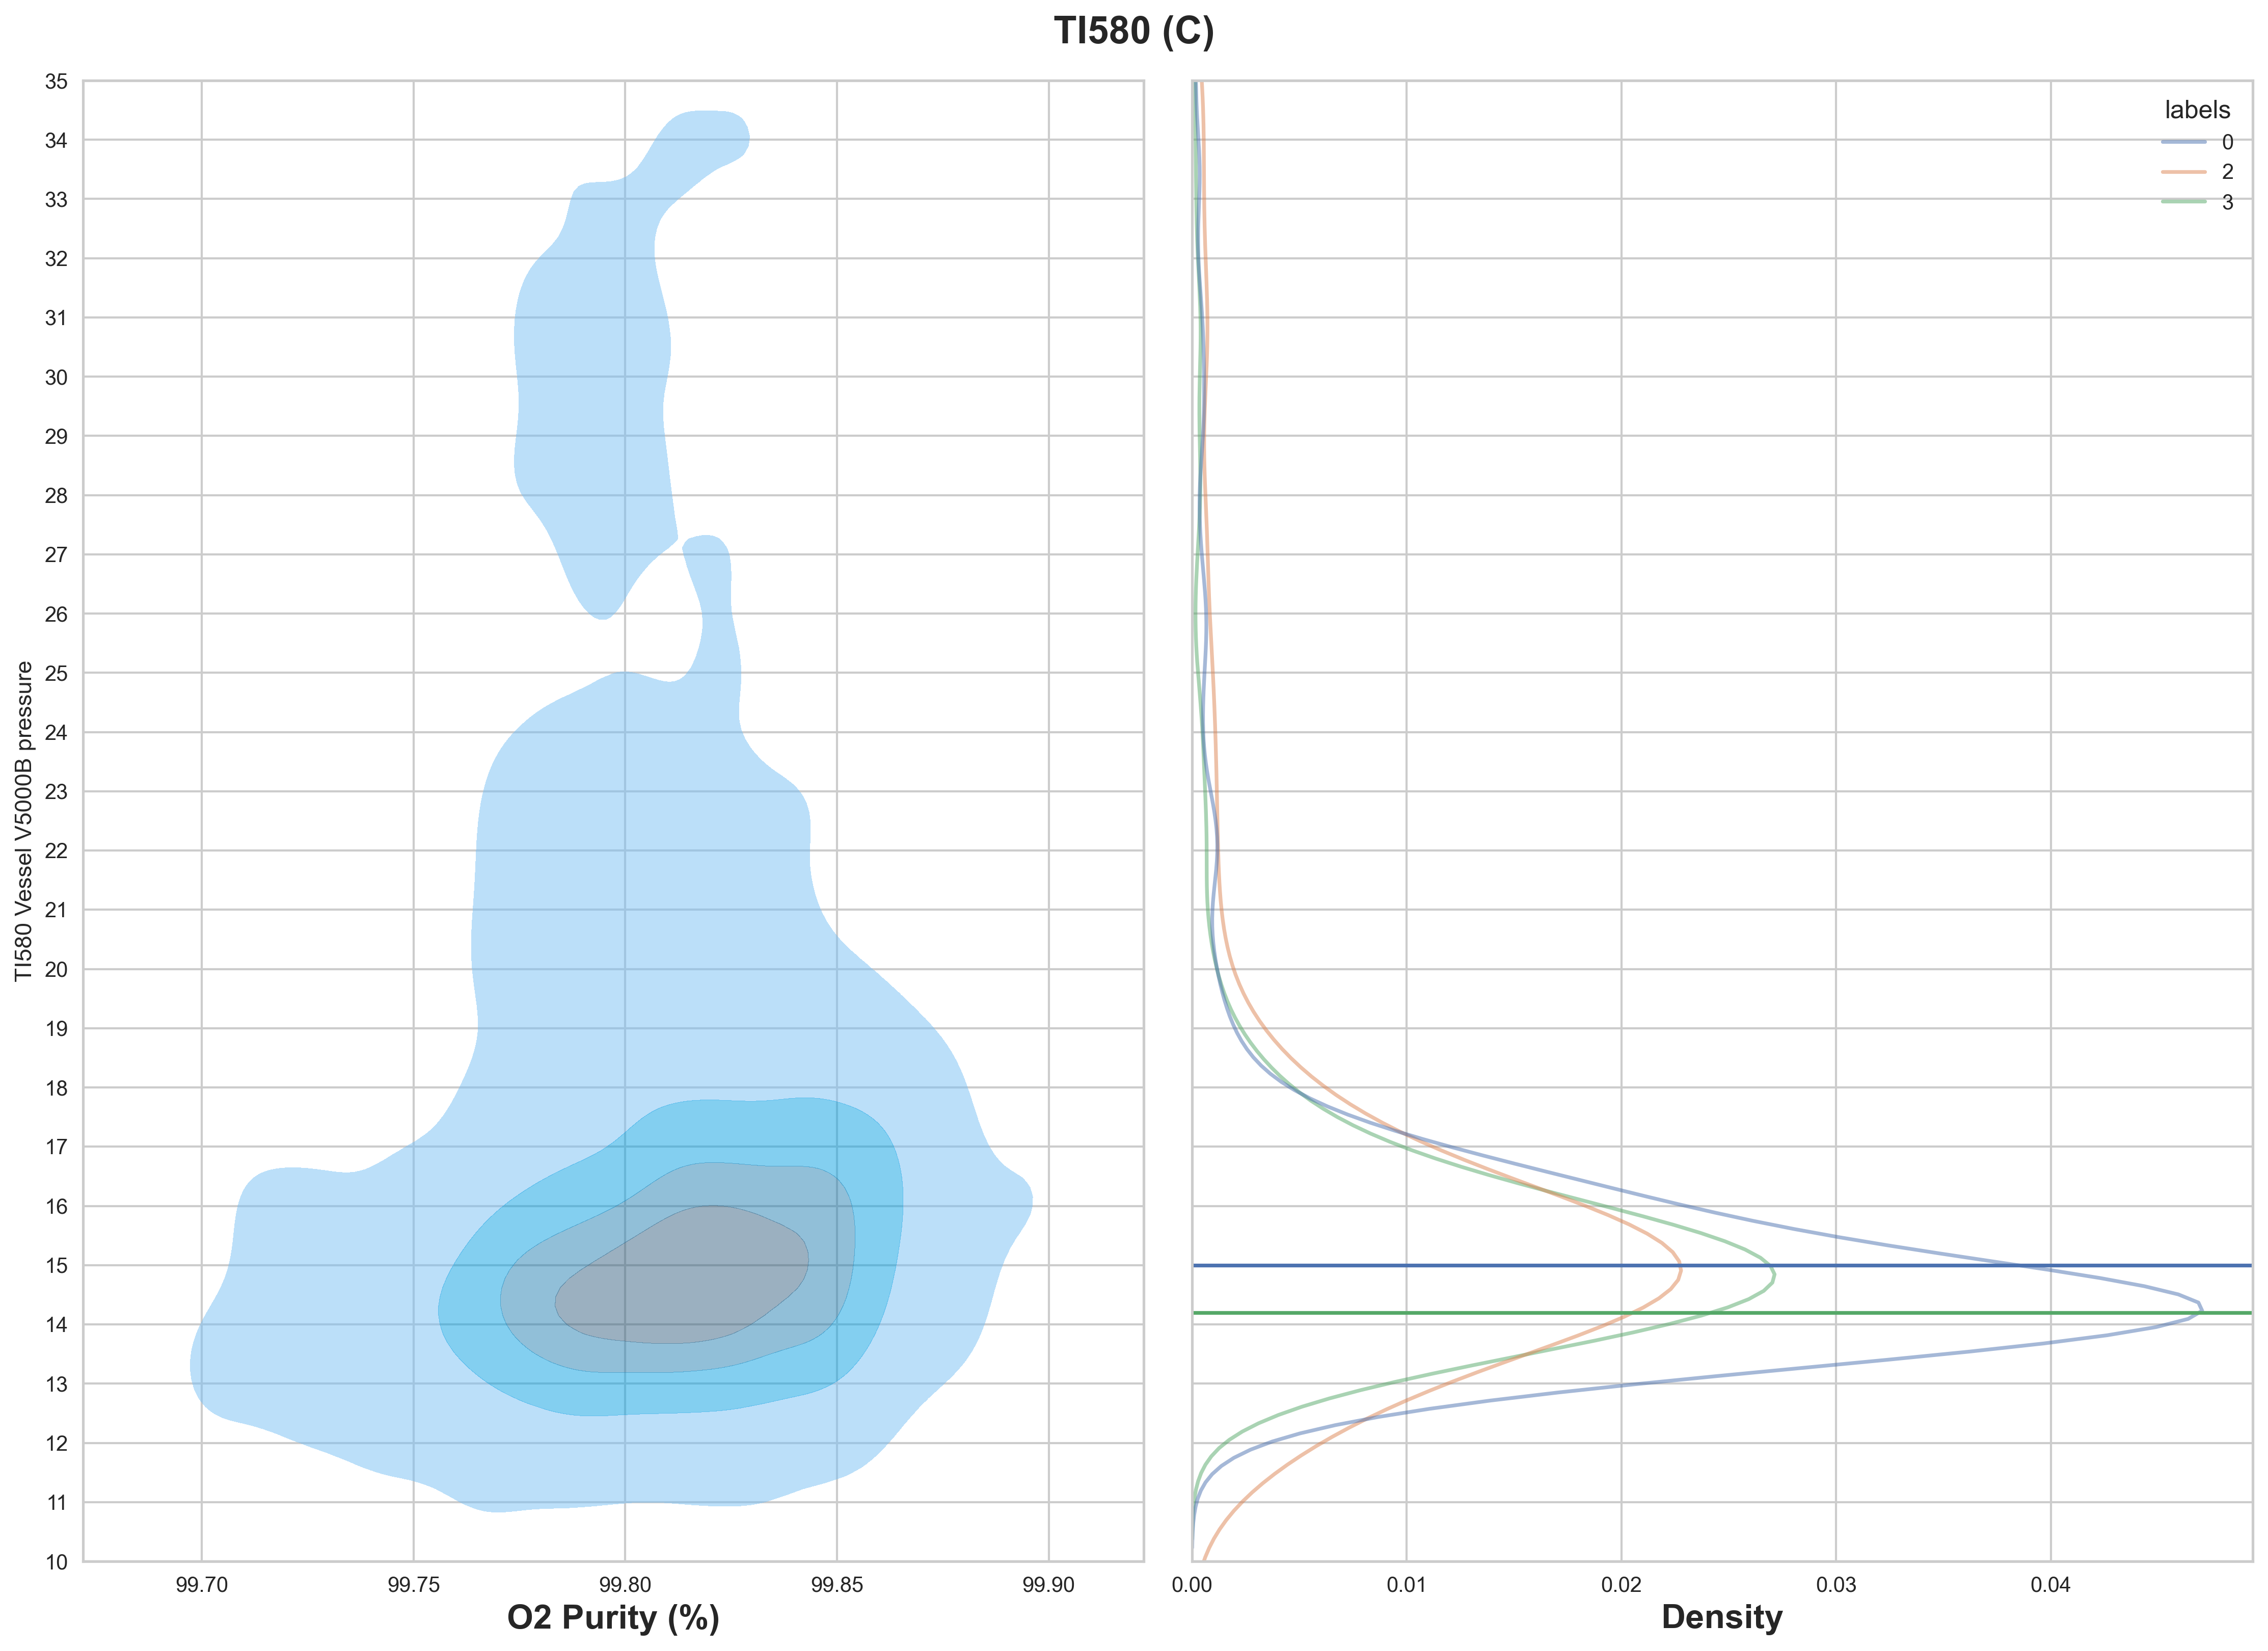

In [22]:
fig = plt.figure(figsize=(15,11),dpi=300)
fig.suptitle('TI580 (C)', fontsize=18,fontweight='bold')
ax1,ax2 = fig.subplots(1,2,sharey=True)
ax1.set_xlabel('O2 Purity (%)', fontsize=16,fontweight='bold')
ax1.set_ylim(10,35)
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.set_xlabel('Density', fontsize=16,fontweight='bold')
sns.kdeplot(
        data=df,
        x= 'AI1 Product gaseous (liquid) oxygen purity',
        y= 'TI580 Vessel V5000B pressure',
        #hue= 'labels',
        hue_order=[0,3],
        alpha = 0.5,
        fill=True,
        levels=5,
        ax= ax1
            )
sns.kdeplot(
        data=df,
        y= 'TI580 Vessel V5000B pressure',
        hue= 'labels',
        hue_order= [0,2,3],
        alpha = 0.5,
        palette= cmap,
        ax= ax2
            )
ax2.axhline(15, c=cmap[0])
ax2.annotate('15 C', xy =(0.09, 15),rotation = 0,ha='center', fontsize=20,alpha = 0.8)
ax2.axhline(14.2, c=cmap[2])
ax2.annotate('14.2 C', xy =(0.09, 14),rotation = 0,ha='center', fontsize=20,alpha = 0.8)
#ax3.axvline(99.795, c='red')
#ax3.annotate('99.79', xy =(99.79, 75),rotation = 90,ha='center', fontsize=18,alpha = 0.8)
fig.tight_layout()
#plt.savefig(f'{working_dir}/kmeans-output/histogram-O2-purity-groupby-kmeans.jpg')
plt.show()
fig.clear()

<div style="font-size: 14;color:black;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
دبی نیتروژن خنک کاری هوای فشرده تولید
</i>
</div>

C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_8748\2613283323.py:21: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(


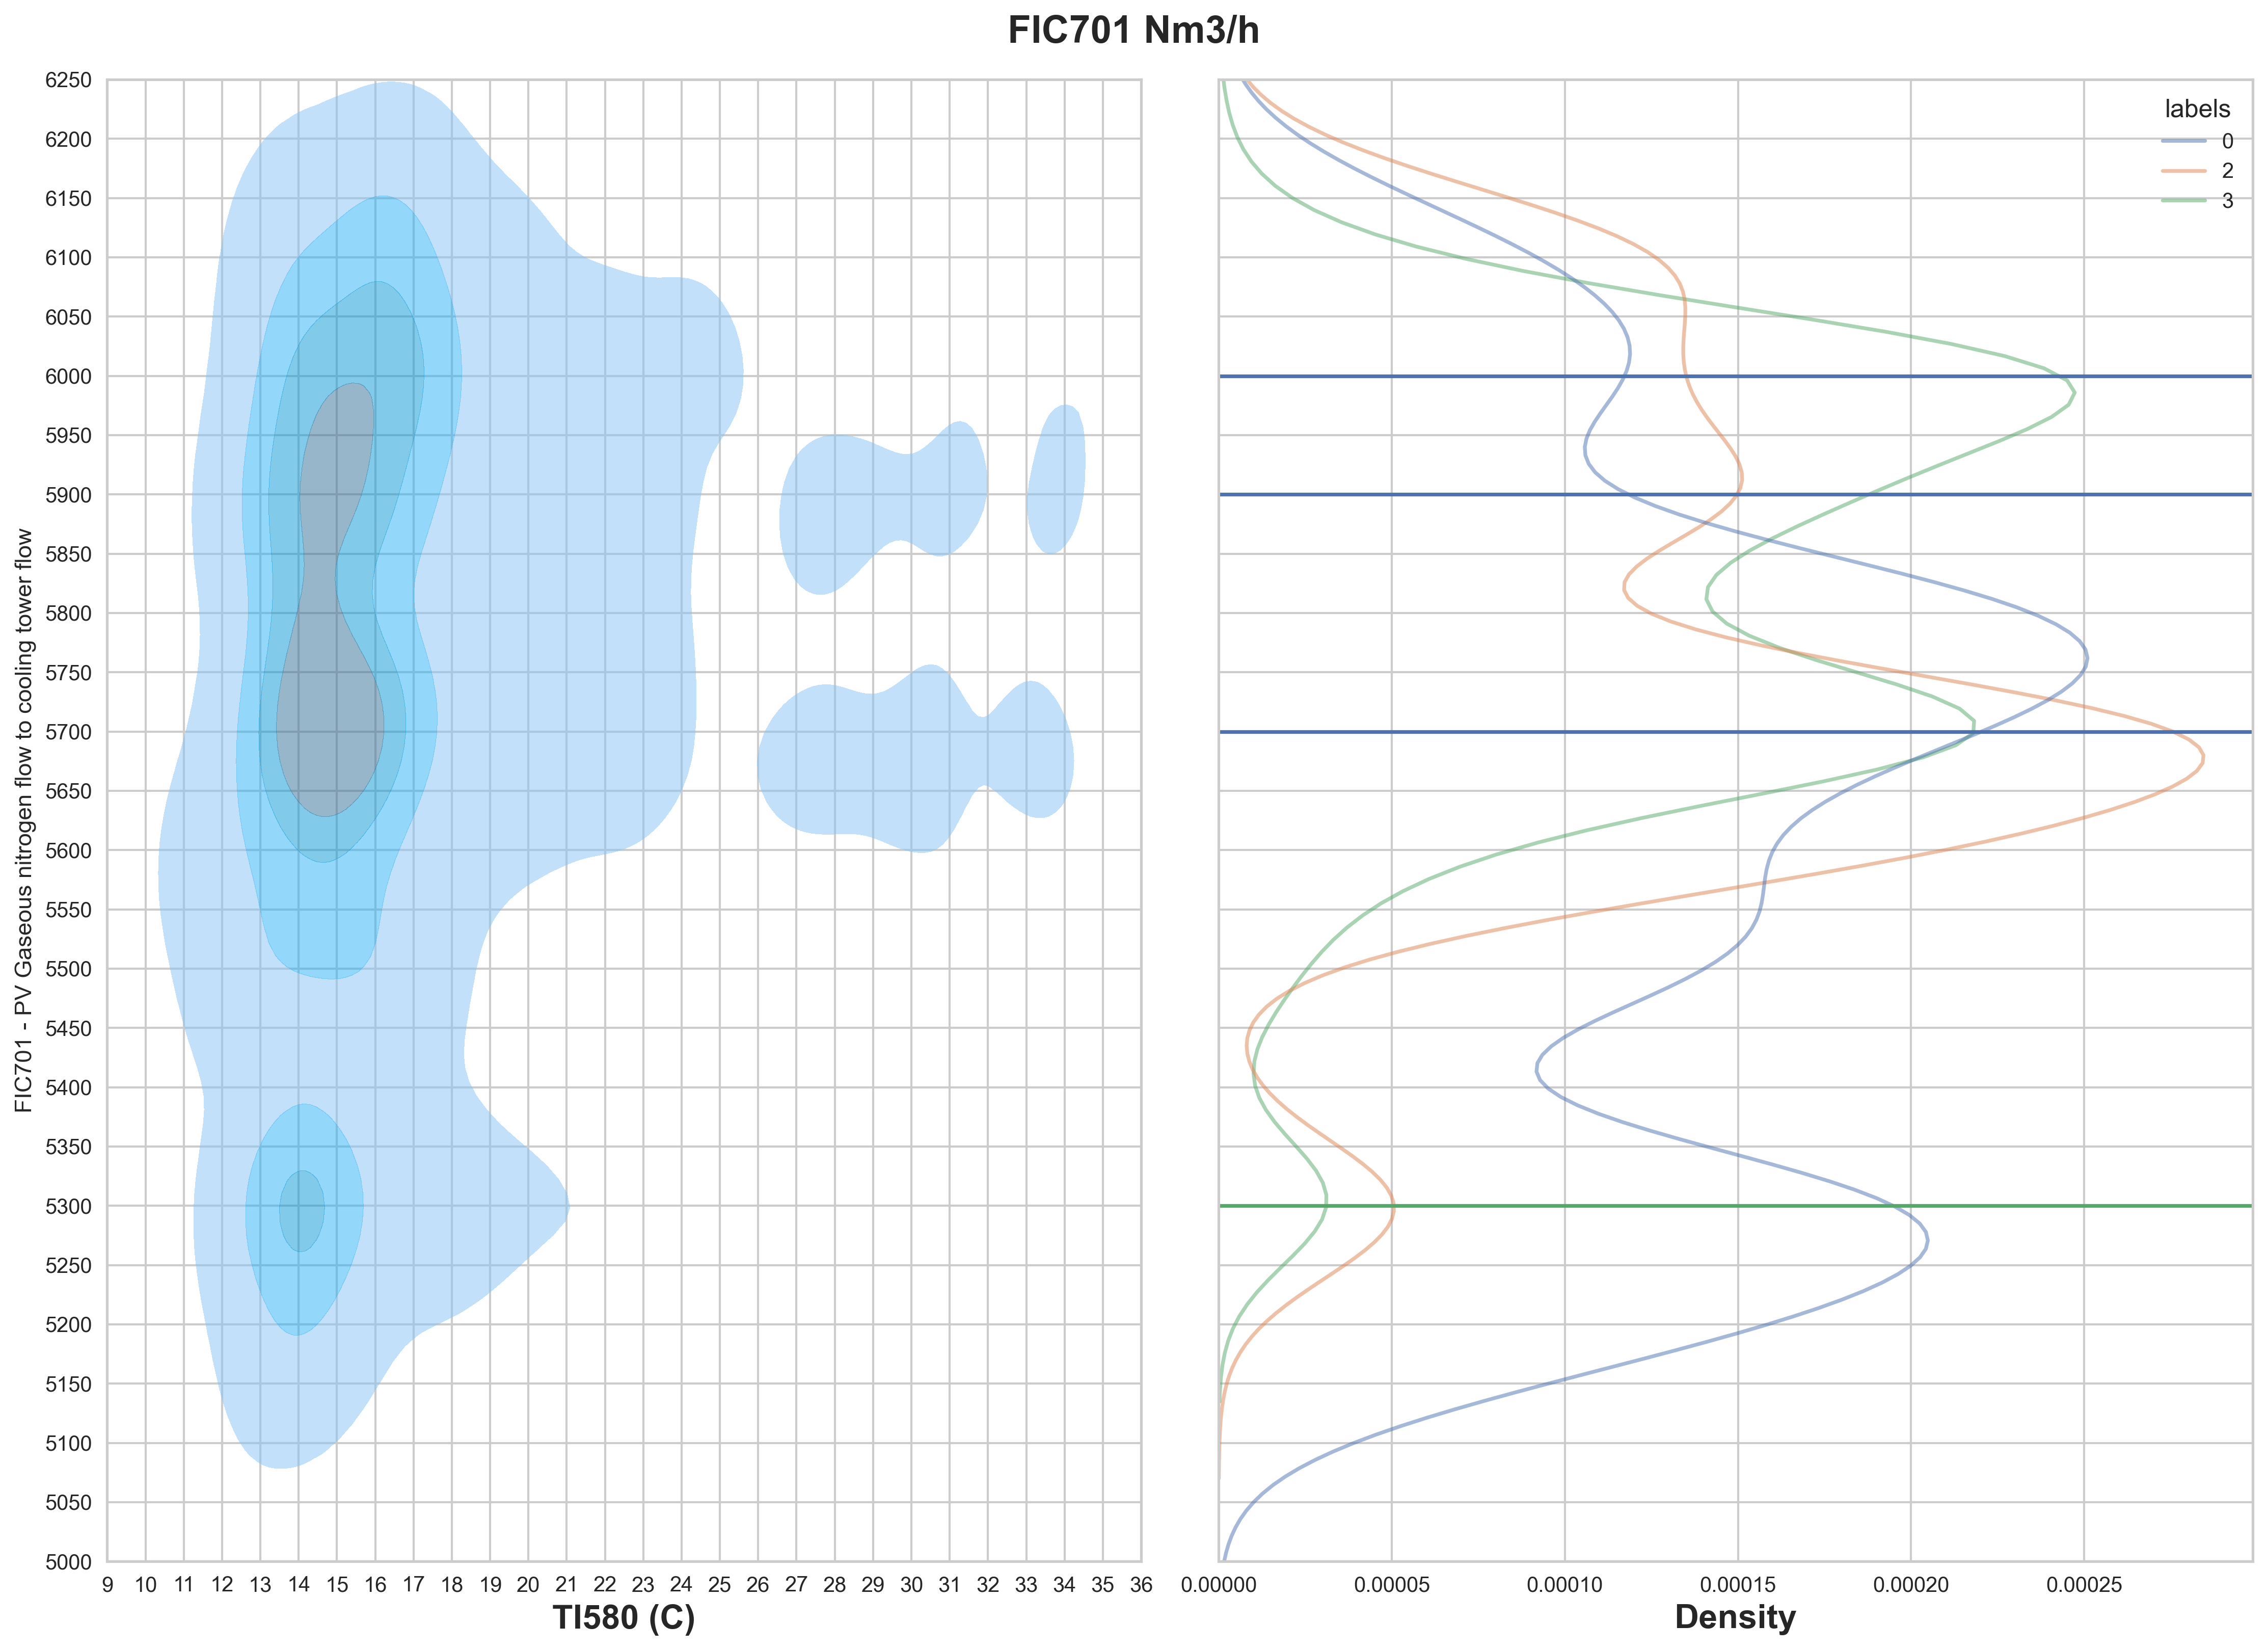

In [23]:
fig = plt.figure(figsize=(15,11),dpi=300)
fig.suptitle('FIC701 Nm3/h', fontsize=18,fontweight='bold')
ax1,ax2 = fig.subplots(1,2,sharey=True)
ax1.set_xlabel('TI580 (C)', fontsize=16,fontweight='bold')
ax1.set_xlim(9,36)
ax1.set_ylim(5000,6250)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax2.set_xlabel('Density', fontsize=16,fontweight='bold')
sns.kdeplot(
        data=df,
        x= 'TI580 Vessel V5000B pressure',
        y= 'FIC701 - PV Gaseous nitrogen flow to cooling tower flow',
        #hue= 'labels',
        hue_order=[0,3],
        alpha = 0.5,
        fill=True,
        levels=5,
        ax= ax1
            )
sns.kdeplot(
        data=df,
        y= 'FIC701 - PV Gaseous nitrogen flow to cooling tower flow',
        hue= 'labels',
        hue_order= [0,2,3],
        alpha = 0.5,
        palette= cmap,
        ax= ax2
            )
ax2.axhline(5900, c=cmap[0])
ax2.annotate('5900 Nm3/h', xy =(0.0009, 5900),rotation = 0,ha='center', fontsize=20,alpha = 0.8)
ax2.axhline(6000, c=cmap[0])
ax2.annotate('6000 Nm3/h', xy =(0.0009, 6000),rotation = 0,ha='center', fontsize=20,alpha = 0.8)
ax2.axhline(5700, c=cmap[0])
ax2.annotate('5700 Nm3/h', xy =(0.0009, 5700),rotation = 0,ha='center', fontsize=20,alpha = 0.8)
ax2.axhline(5300, c=cmap[2])
ax2.annotate('5300 Nm3/h', xy =(0.001, 5300),rotation = 0,ha='center', fontsize=20,alpha = 0.8)
#ax1.axvline(99.807, c=cmap[3])
#ax1.annotate('99.807 %', xy =(99.805, 91),rotation = 90,ha='center', fontsize=18,alpha = 0.8)
#ax3.axvline(99.795, c='red')
#ax3.annotate('99.79', xy =(99.79, 75),rotation = 90,ha='center', fontsize=18,alpha = 0.8)
fig.tight_layout()
#plt.savefig(f'{working_dir}/kmeans-output/histogram-O2-purity-groupby-kmeans.jpg')
plt.show()
fig.clear()

<div style="font-size: 14;color:black;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
4- نمونه روزهایی که با شرایط مدنظر تولید داشته ایم
</b>
</div>

In [ ]:
mask = pd.DataFrame()
mask['cond1'] = df['labels'] == 0
mask['cond2'] = df['AI1 Product gaseous (liquid) oxygen purity'].gt(99.82)
mask['cond3'] = df['SIC401B - PV Air turbine/booster T/C2000B speed'].between(27750,27800)
mask['cond4'] = df['TI580 Vessel V5000B pressure'].between(14.8,15.2)
mask['cond5'] = df['FIC701 - PV Gaseous nitrogen flow to cooling tower flow'].between(5900,6100)
mask['results'] = mask['cond1']*mask['cond2']*mask['cond3']*mask['cond4']*mask['cond5']

print(df[mask['results']].describe())
golden_day_df = df[mask['results']]
#golden_day_df.to_excel(f"{working_dir}/temp/golden_days.xlsx",index=False)


       AI1 Product gaseous (liquid) oxygen purity  \
count                                   28.000000   
mean                                    99.836857   
std                                      0.014388   
min                                     99.820600   
25%                                     99.825200   
50%                                     99.831600   
75%                                     99.844650   
max                                     99.865700   

       AI4 Oxygen content in waste nitrogen  \
count                             28.000000   
mean                              90.296636   
std                                0.261703   
min                               89.872700   
25%                               90.147600   
50%                               90.230750   
75%                               90.420625   
max                               91.066300   

       Analys Argon (AI7) Product argon purity (O2 content)  \
count                              